Imports

In [34]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


# Load dataset


In [35]:
data = load_wine()
X = data.data
y = data.target

print(data.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

# Split the data into training and testing sets

The Iris dataset is used as a simple example with three classes.
Data is split into training (70%) and testing (30%) sets.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the Decision Tree Classifier


In [37]:
dt_model = DecisionTreeClassifier(random_state=42)


# Define hyperparameter search space
criterion: Defines the splitting criterion (gini or entropy).

max_depth: Limits the depth of the tree.

min_samples_split: Minimum samples required to split a node.

The criterion in a Decision Tree Classifier specifies the function used to measure the quality of a split. It determines how the tree splits the dataset at each node to maximize information gain.

criterion: The function used to evaluate the quality of a split (e.g., gini or entropy).


In [38]:
param_grid = {
    "criterion": ["gini", "entropy"],  # Split criterion
    "max_depth": [2, 4, 6, 8, 10],    # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split
}

# **Grid Search**


estimator - This is the machine learning model (or pipeline) you want to optimize.


param_grid - This defines the hyperparameters and their possible values that Grid Search or Random Search will explore.


#estimator
This is the machine learning model (or pipeline) you want to optimize.

In this case:
dt_model is your DecisionTreeClassifier instance.
It specifies the model on which you want to perform hyperparameter tuning.

#param_grid
This defines the hyperparameters and their possible values that Grid Search or Random Search will explore.

In this case:

python
Copy code
param_grid = {
    "criterion": ["gini", "entropy"],         # Splitting criteria
    "max_depth": [2, 4, 6, 8, 10],           # Depth of the tree
    "min_samples_split": [2, 5, 10]          # Minimum samples to split a node
}
criterion: The function used to evaluate the quality of a split (e.g., gini or entropy).
max_depth: Restricts the maximum depth of the decision tree.
min_samples_split: Sets the minimum number of samples required to split an internal node.
For Grid Search, every combination of these hyperparameters will be tested (in this case, 2 × 5 × 3 = 30 combinations). For Random Search, a random subset of these combinations is tested.

#cv
This stands for Cross-Validation, which is used to split the training data into several subsets (or folds) to validate the performance of the hyperparameters.

In this case:
cv=5 means the training data will be split into 5 folds.
For each fold, 80% of the data will be used to train the model, and 20% will be used to validate it.
The performance score is averaged across these folds.

#Why use Cross-Validation?

Ensures that the hyperparameter evaluation is not biased by how the data is split into training and validation sets.


#scoring
This specifies the metric used to evaluate model performance for each combination of hyperparameters.

In this case:
scoring="accuracy" means that the accuracy metric will be used.


#verbose
Controls the verbosity of the output during the search.

In this case:
verbose=1 means you'll see progress logs as Grid Search or Random Search runs.
It provides updates about the number of folds and parameter combinations being evaluated.

Other values:

verbose=0: No output.
verbose=2: More detailed output (e.g., detailed progress for each fold).

In [39]:
print("Performing Grid Search...")
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1)
grid_search.fit(X_train, y_train)


Performing Grid Search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

# Best parameters from Grid Search



In [40]:
print("Best parameters (Grid Search):", grid_search.best_params_)


Best parameters (Grid Search): {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


# Evaluate Grid Search result


#Precision: 1.00
1.00 - All predictions for class 0 are correct.

#Recall: 1.00
1.00 - All actual samples of class 0 are correctly identified.
#F1-Score: 1.00
1.00 - A harmonic mean of precision and recall.

#Support: 19 samples in the test set belong to class 0.

In [41]:
grid_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy (Grid Search):", accuracy_score(y_test, grid_pred))
print("Classification Report (Grid Search):")
print(classification_report(y_test, grid_pred))

Accuracy (Grid Search): 0.9629629629629629
Classification Report (Grid Search):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



# **Random Search**


In [42]:
print("\nPerforming Random Search...")
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, n_iter=5, cv=5, scoring="accuracy", random_state=42, verbose=1)
random_search.fit(X_train, y_train)



Performing Random Search...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy', verbose=1)

# Best parameters from Random Search


In [43]:
print("Best parameters (Random Search):", random_search.best_params_)


Best parameters (Random Search): {'min_samples_split': 10, 'max_depth': 6, 'criterion': 'gini'}


# Evaluate Random Search result


In [44]:
random_pred = random_search.best_estimator_.predict(X_test)
print("Accuracy (Random Search):", accuracy_score(y_test, random_pred))
print("Classification Report (Random Search):")
print(classification_report(y_test, random_pred))

Accuracy (Random Search): 0.9629629629629629
Classification Report (Random Search):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [45]:
print("Cross-validation scores:", random_search.cv_results_['mean_test_score'])


Cross-validation scores: [0.89533333 0.87133333 0.87966667 0.87133333 0.93533333]



Visualizing Confusion Matrices...


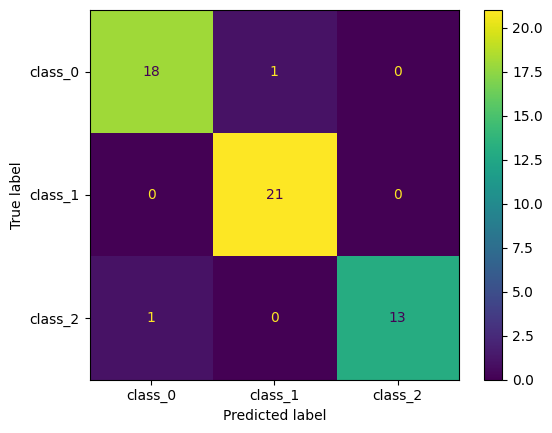

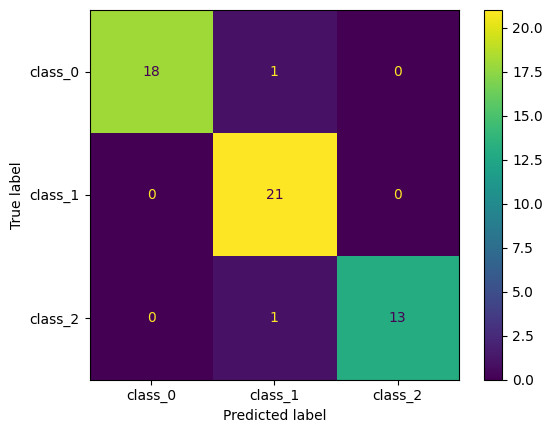

In [46]:
print("\nVisualizing Confusion Matrices...")
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, display_labels=data.target_names)
ConfusionMatrixDisplay.from_estimator(random_search.best_estimator_, X_test, y_test, display_labels=data.target_names)
